## Variáveis

- **Class**: Variável alvo que indica se ocorreu recorrência do câncer de mama (no-recurrence-events = sem recorrência, recurrence-events = recorrência).
- **age**: Idade do paciente em faixas etárias (10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99 anos).
- **menopause**: Estado da menopausa do paciente (lt40 = antes dos 40 anos, ge40 = igual ou acima dos 40 anos, premeno = pré-menopausa).
- **tumor-size**: Tamanho do tumor em milímetros (0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59 mm).
- **inv-nodes**: Número de linfonodos invadidos (0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39).
- **node-caps**: Se os linfonodos estão encapsulados ou não (yes = sim, no = não).
- **deg-malig**: Grau de malignidade do tumor (1, 2, 3).
- **breast**: Lado do seio afetado pelo câncer (left = esquerdo, right = direito).
- **breast-quad**: Quadrante do seio afetado pelo câncer (left-up = superior esquerdo, left-low = inferior esquerdo, right-up = superior direito, right-low = inferior direito, central = central).
- **irradiat**: Se o paciente recebeu tratamento de radioterapia ou não (yes = sim, no = não).


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [12]:
warnings.filterwarnings('ignore') 
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [13]:
# Carregando os dados
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data"
column_names = ["Class", "age", "menopause", "tumor-size", "inv-nodes", "node-caps", "deg-malig", "breast", "breast-quad", "irradiat"]
data = pd.read_csv(data_url, names=column_names)
display(data.head(), data.shape)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


(286, 10)

In [14]:
# Convertendo as variáveis para tipos categóricos
data["Class"] = data["Class"].astype("category")
data["age"] = data["age"].astype("category")
data["menopause"] = data["menopause"].astype("category")
data["tumor-size"] = data["tumor-size"].astype("category")
data["inv-nodes"] = data["inv-nodes"].astype("category")
data["node-caps"] = data["node-caps"].astype("category")
data["deg-malig"] = data["deg-malig"].astype("category")
data["breast"] = data["breast"].astype("category")
data["breast-quad"] = data["breast-quad"].astype("category")
data["irradiat"] = data["irradiat"].astype("category")

In [15]:
# Descrição das variáveis categóricas
print("Descrição das variáveis categóricas:")
display(data.describe(include=["category"]))

# Descrição das variáveis numéricas
print("\nDescrição das variáveis numéricas:")
display(data.describe())


Descrição das variáveis categóricas:


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,286,286,286,286,286,286,286,286,286,286
unique,2,6,3,11,7,3,3,2,6,2
top,no-recurrence-events,50-59,premeno,30-34,0-2,no,2,left,left_low,no
freq,201,96,150,60,213,222,130,152,110,218



Descrição das variáveis numéricas:


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,286,286,286,286,286,286,286,286,286,286
unique,2,6,3,11,7,3,3,2,6,2
top,no-recurrence-events,50-59,premeno,30-34,0-2,no,2,left,left_low,no
freq,201,96,150,60,213,222,130,152,110,218


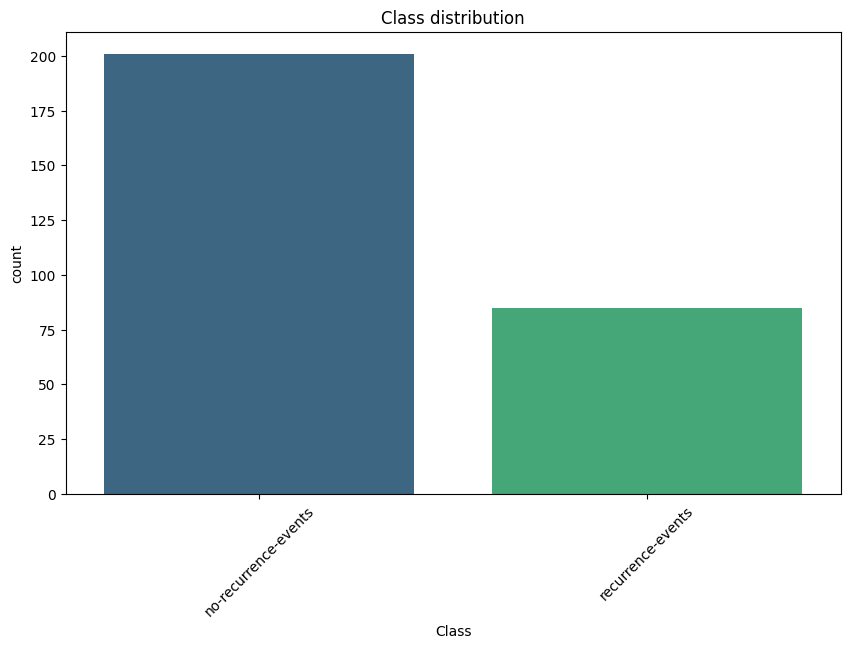

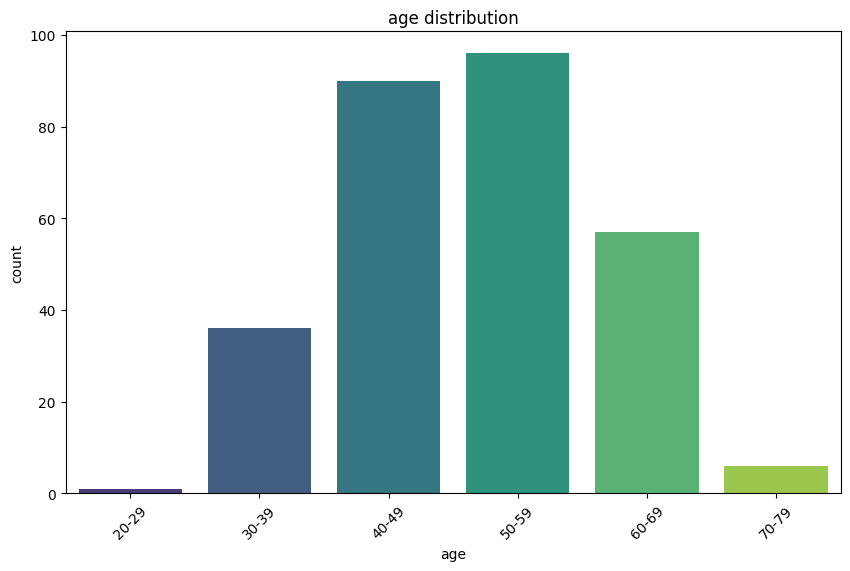

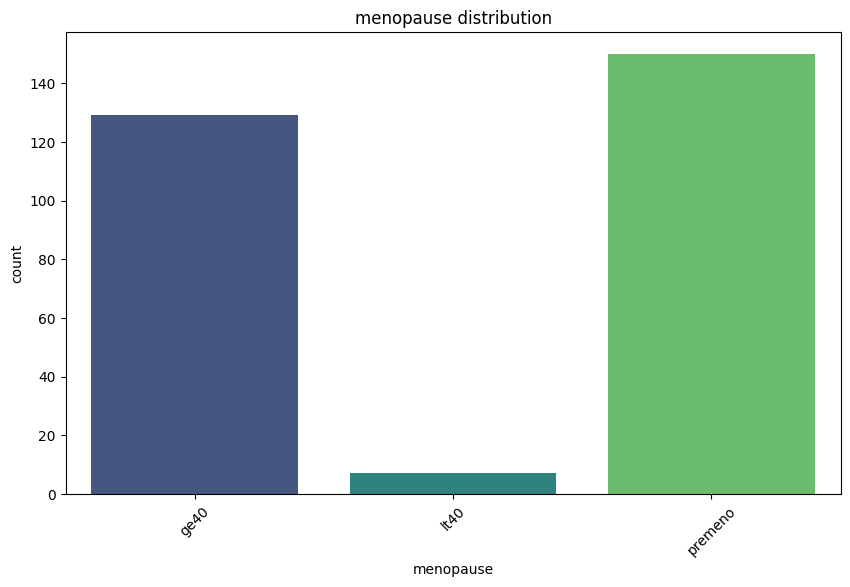

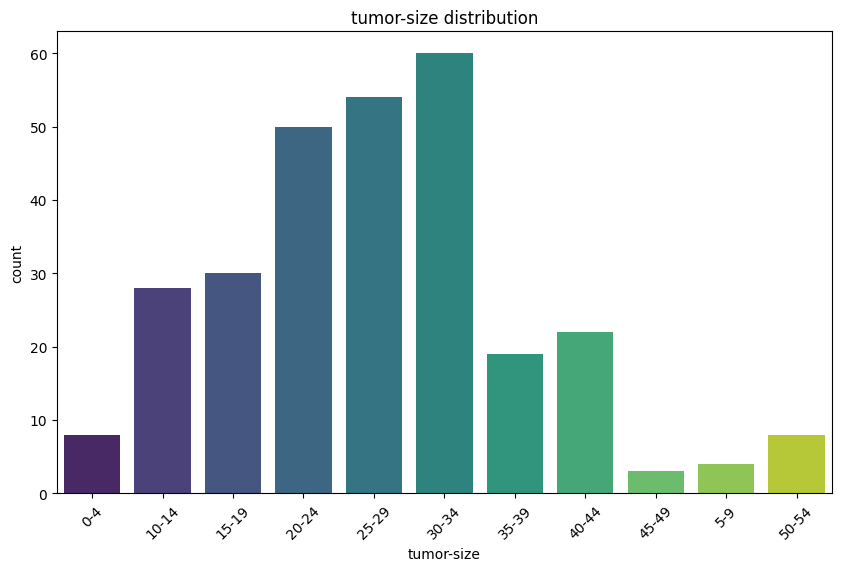

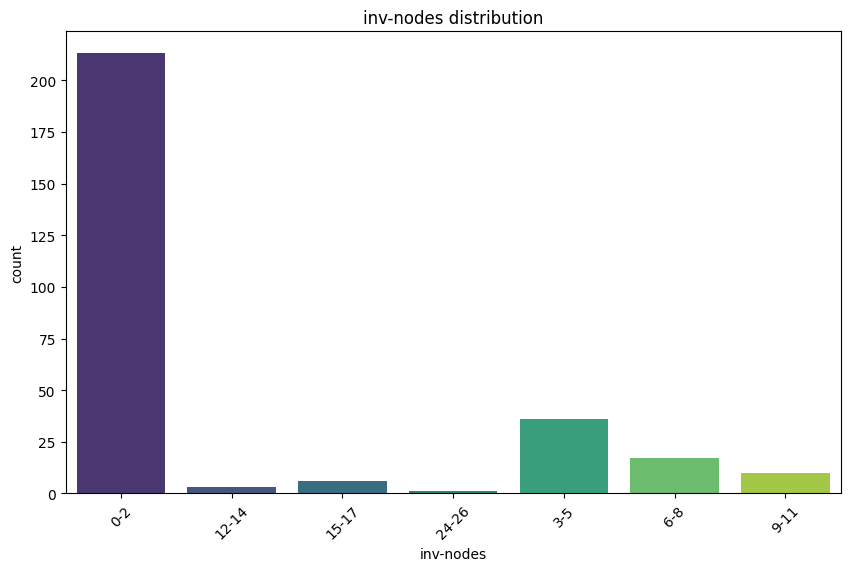

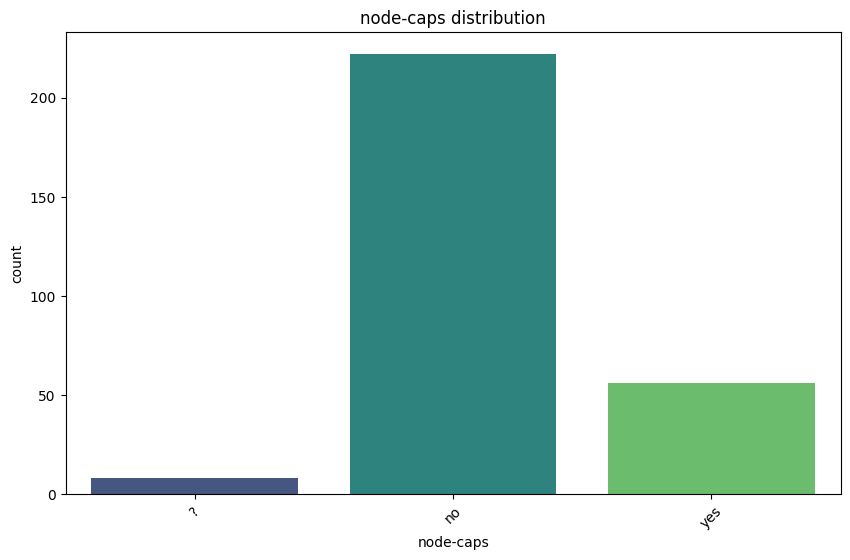

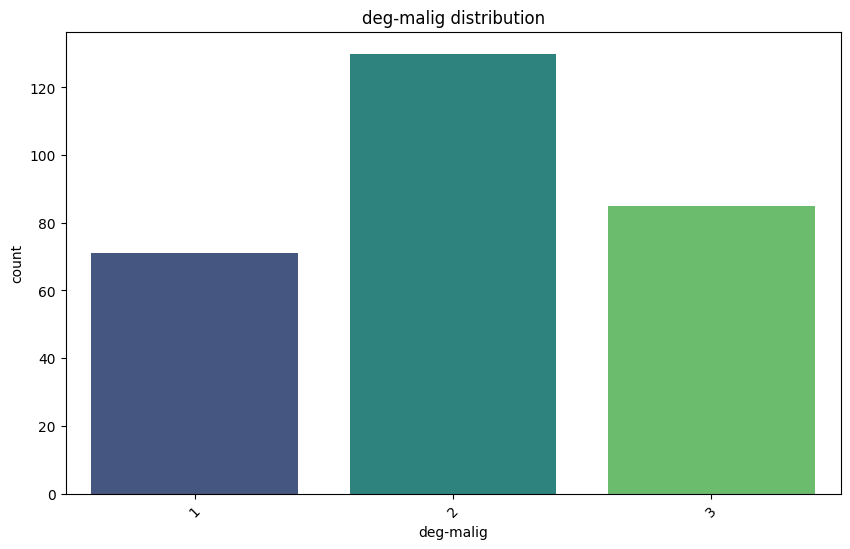

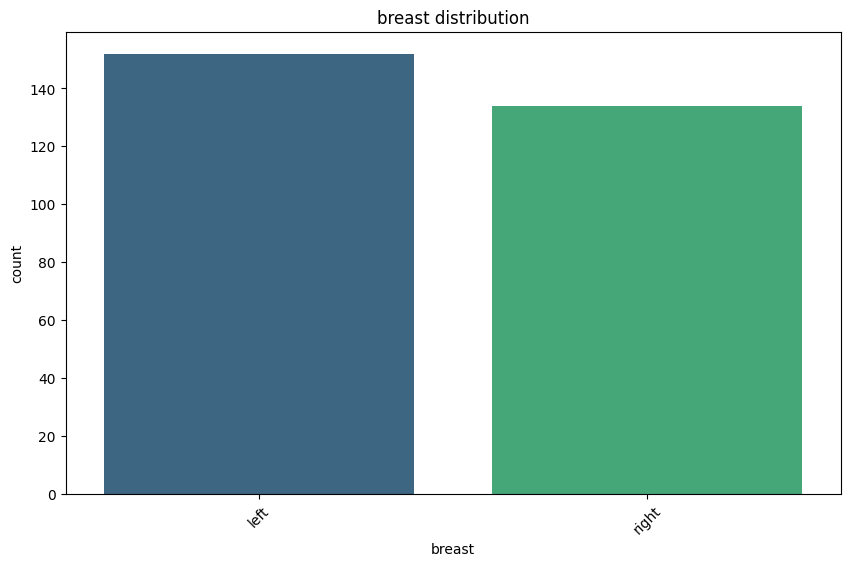

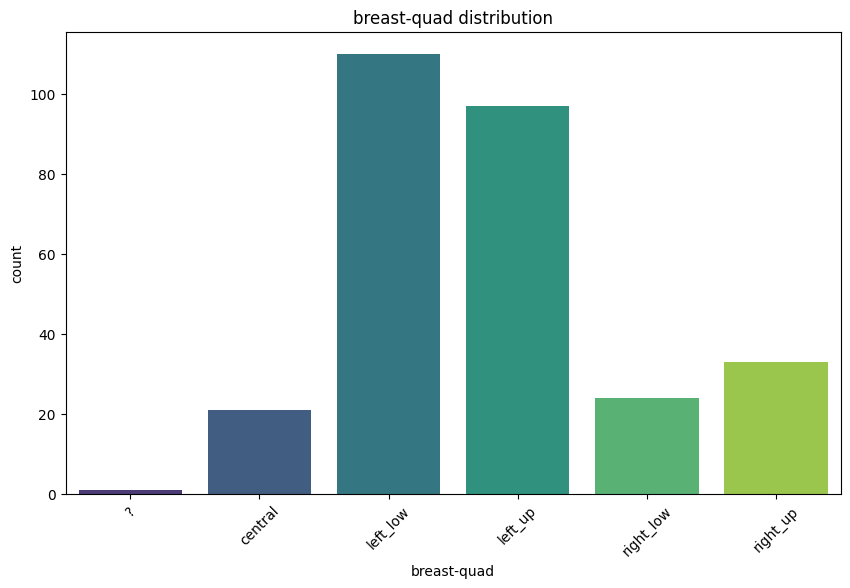

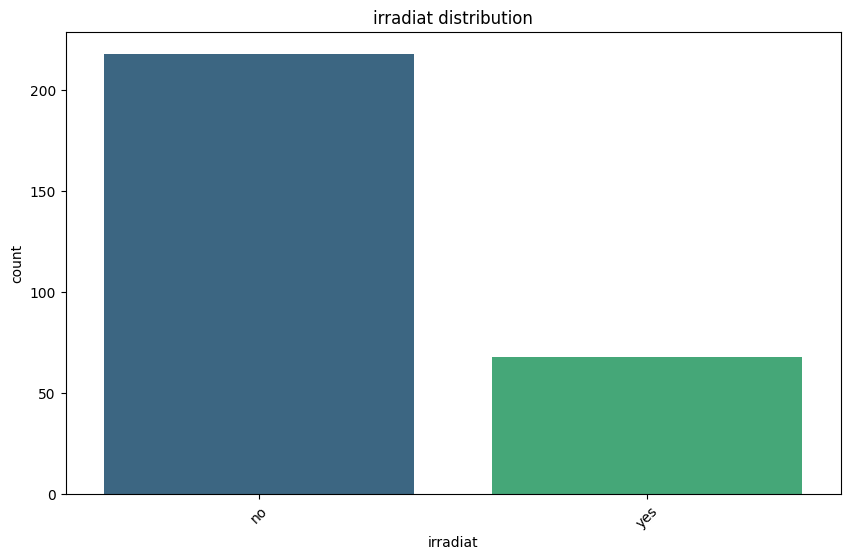

In [27]:
# Gráficos univariados
for col in data.select_dtypes(include=["category"]):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data, palette='viridis')
    plt.title(f"{col} distribution")
    plt.xticks(rotation=45)
    plt.show()

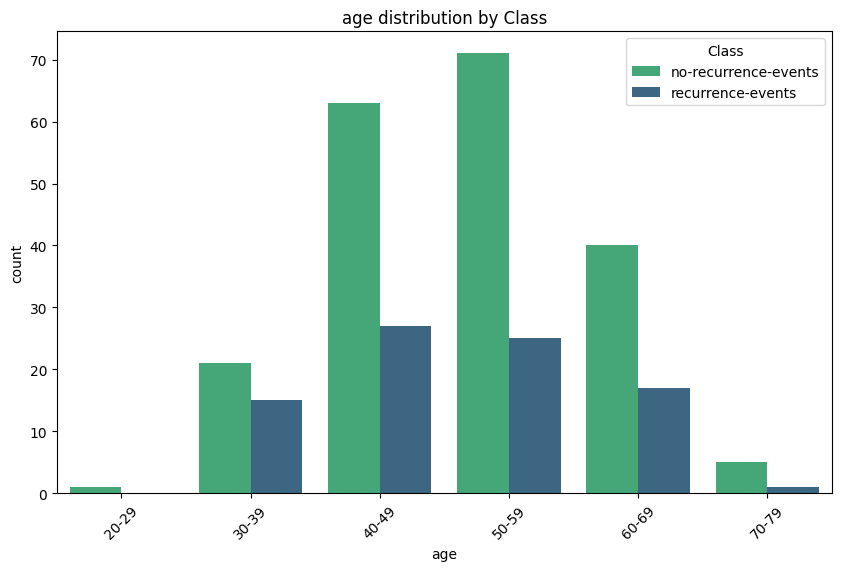

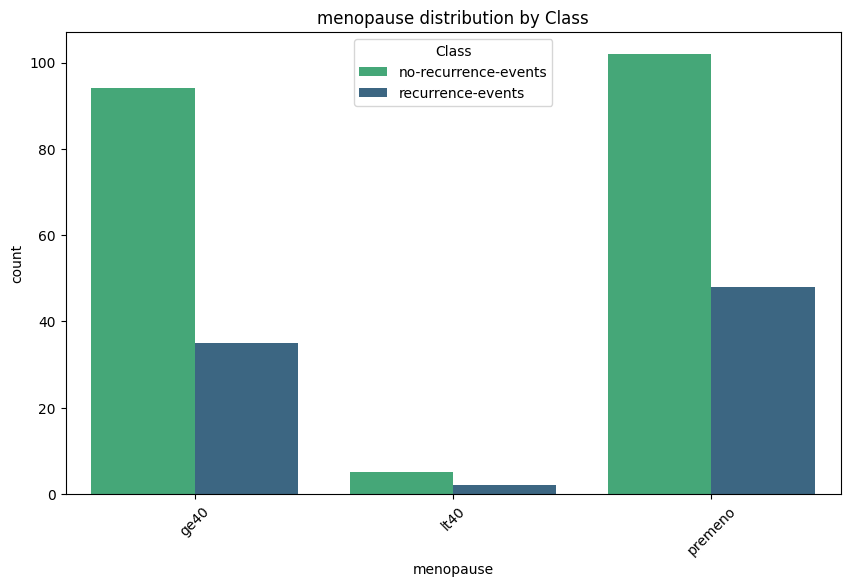

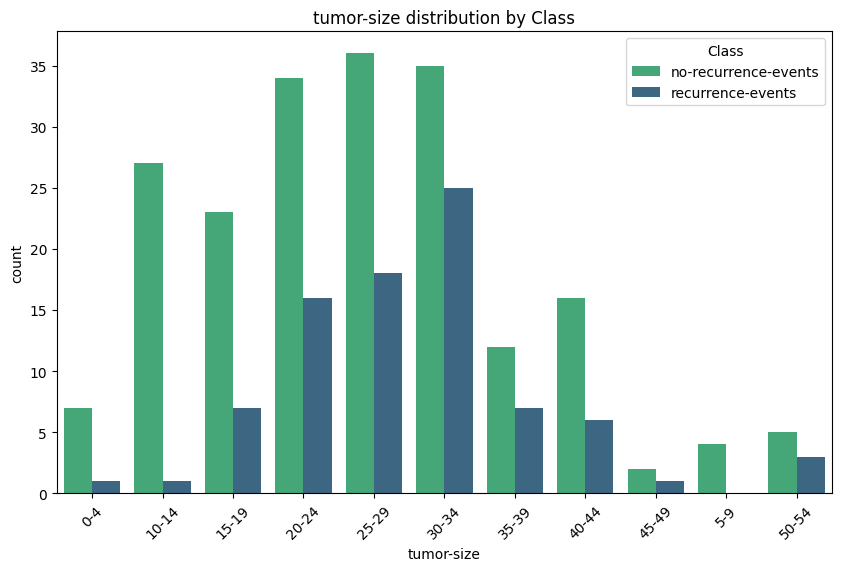

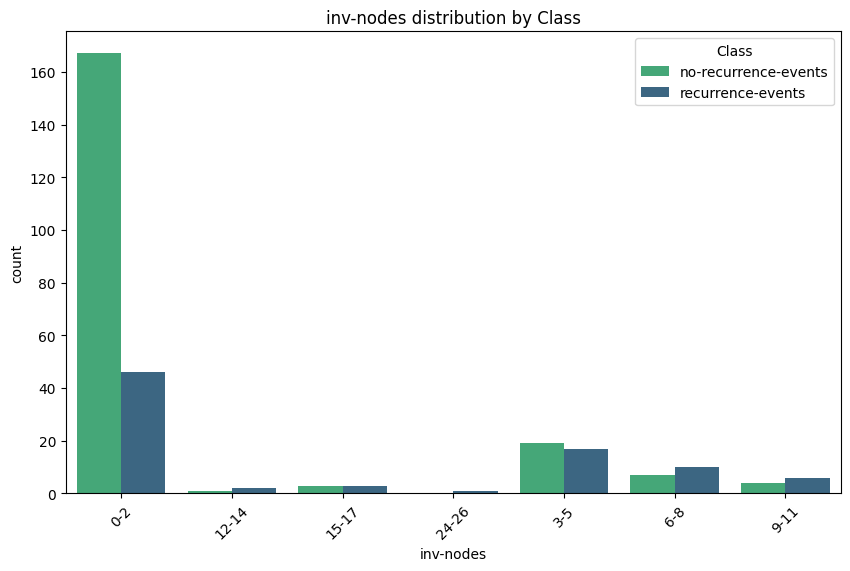

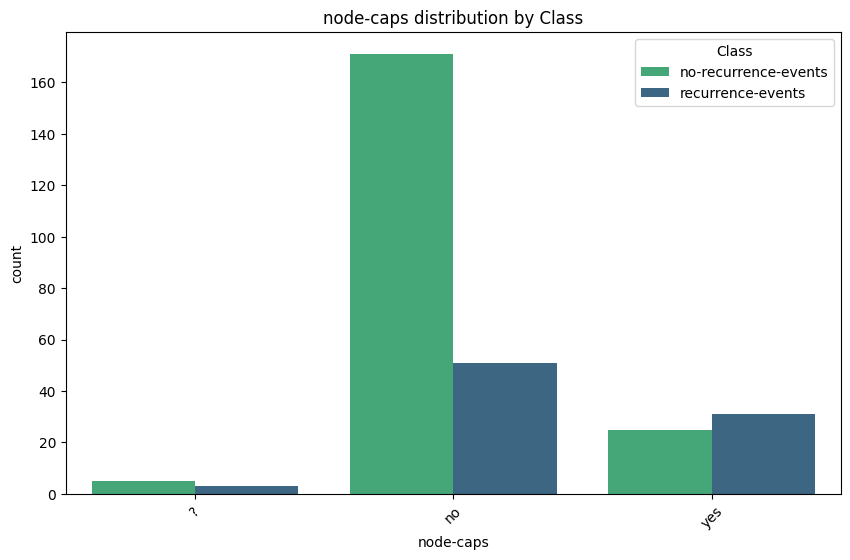

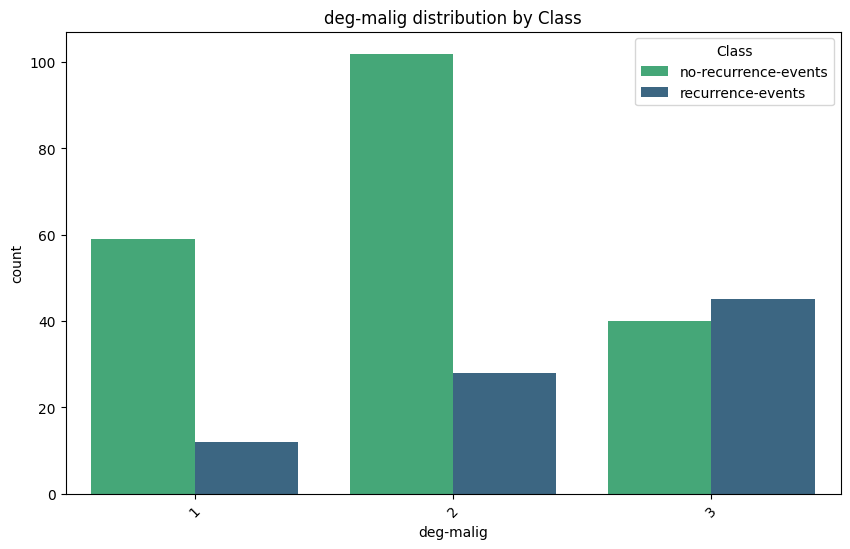

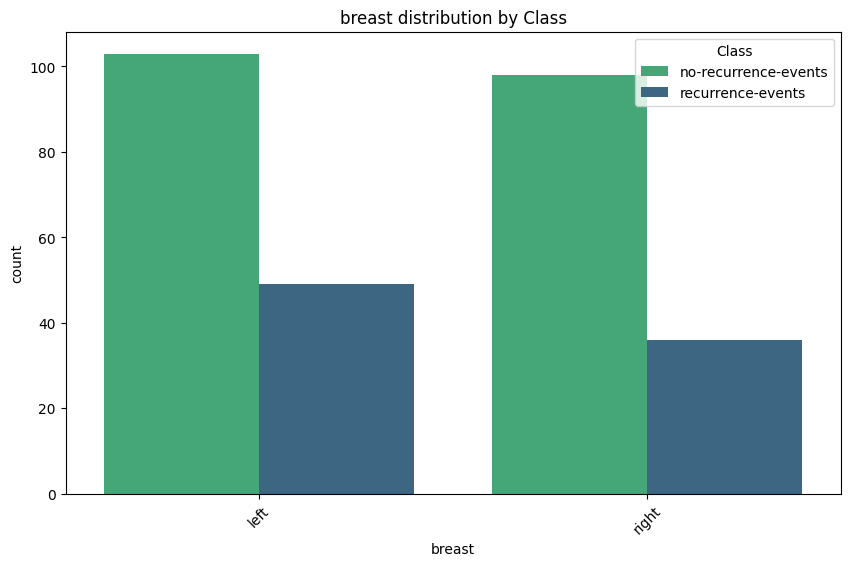

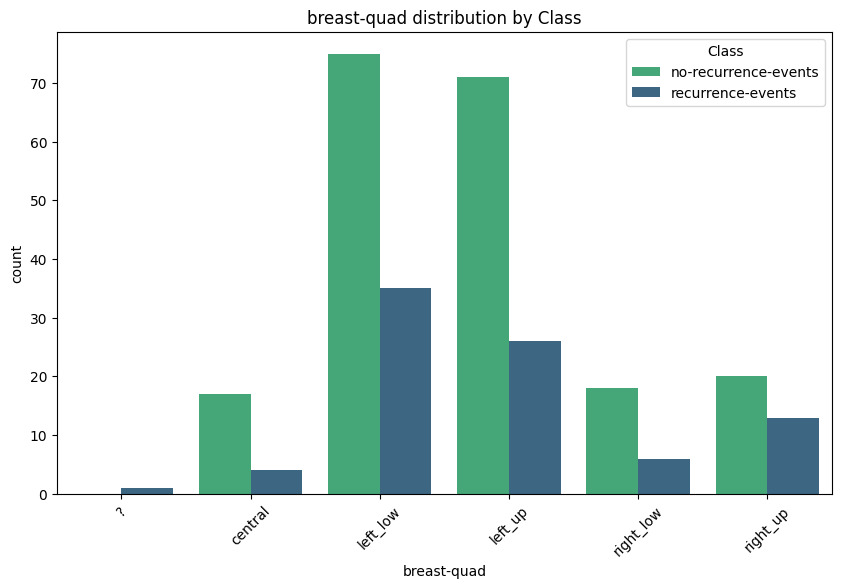

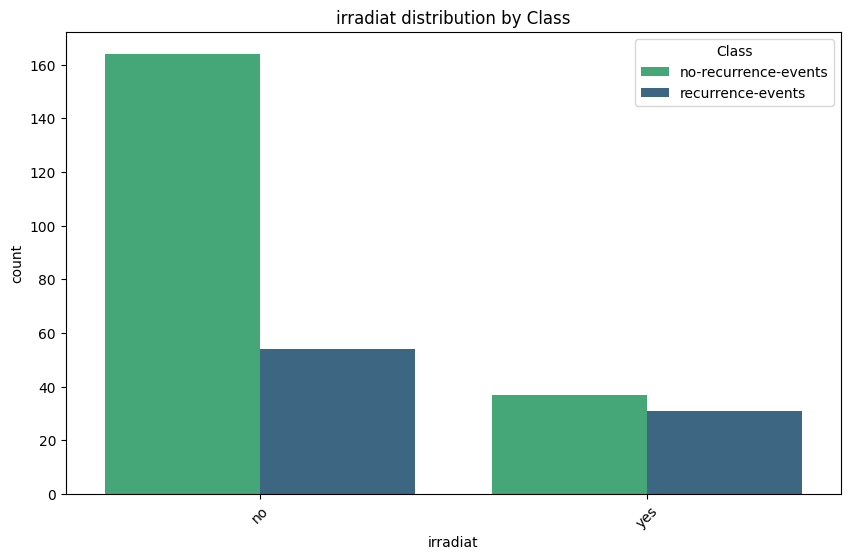

In [29]:
# Gráficos bivariados
for col in data.select_dtypes(include=["category"]):
    if col != "Class":
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, data=data, hue="Class", palette='viridis_r')
        plt.title(f"{col} distribution by Class")
        plt.xticks(rotation=45)
        plt.show()

In [19]:
# # Matriz de correlação
# plt.figure(figsize=(12, 8))
# sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Matriz de Correlação das Variáveis")
# plt.show()
